# I. Classification

## 1. k-Nearest Neighbors

In [30]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

In [32]:
from sklearn.model_selection import train_test_split
import numpy as np

x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [45]:
# Apply kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1, 26)
scores = {}
scores_list_train = []
scores_list_test = []

for k in k_range:
    # Create classifier with K as the neighbour count
    classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit classifier to training data
    classifier.fit(x_train, y_train)
    
    # Test classifier against seen test data (training data)
    y_pred_train = classifier.predict(x_train)
    
    # Test classifier against un-seen test data (testing data)
    y_pred_test = classifier.predict(x_test)
    
    # Log results.
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list_test.append(metrics.accuracy_score(y_test, y_pred_test))
    scores_list_train.append(metrics.accuracy_score(y_train, y_pred_train))

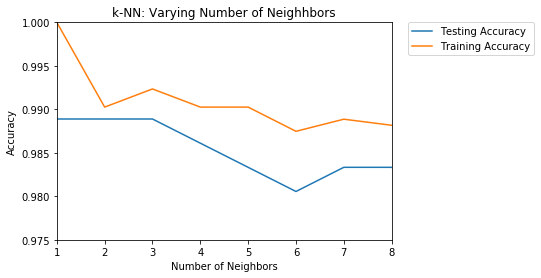

In [50]:
# Plot data.
plt.plot(k_range, scores_list_test, label="Testing Accuracy")
plt.plot(k_range, scores_list_train, label="Training Accuracy")

plt.title("k-NN: Varying Number of Neighhbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.xlim(1, 8)
plt.ylim(0.975, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

These results indicate that a k-value of 1 produces highest accuracy for both sets of data, and a k-value of 3 produces the 2nd-highest accuracy.

## 2. Support Vector Machine

In [75]:
from sklearn import svm

svm_scores = {}

kernels = ["linear", "rbf", "poly"]

svm_accs = []

for kernel in kernels:
    clf = svm.SVC(kernel=kernel, gamma='scale')
    clf.fit(x_train, y_train)
    
    svm_y_pred = clf.predict(x_test)
    print("====> " + kernel + "-kernel results:")
    print(metrics.classification_report(y_test, svm_y_pred))
    svm_accs.append(metrics.accuracy_score(y_test, svm_y_pred))

====> linear-kernel results:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       0.95      1.00      0.97        35
           2       0.97      1.00      0.99        36
           3       1.00      0.95      0.97        37
           4       1.00      0.97      0.98        32
           5       0.96      0.98      0.97        46
           6       1.00      0.97      0.98        30
           7       1.00      0.98      0.99        42
           8       1.00      0.95      0.97        38
           9       0.90      0.97      0.93        29

   micro avg       0.97      0.97      0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360

====> rbf-kernel results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35
           2       1.00

We can see that the polynomial and gamma kernels outperformed the linear kernel. Polynomial could be opted for as it has consistently accuracy, though a similar average to the gamma kernel.

## 3. Naive Bayes

Accuracy of using Naive Bayes method for classification: 0.8472222222222222


AttributeError: 'AxesSubplot' object has no attribute 'xlabel'

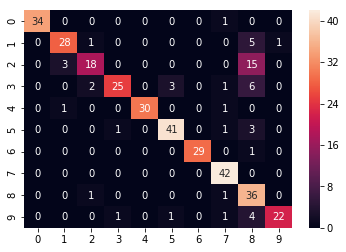

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)

accuracy = (y_test.shape[0] - (y_test != y_pred).sum()) / y_test.shape[0]
print("Accuracy of using Naive Bayes method for classification: " + str(accuracy))

plt = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")

Text(0.5, 1.0, 'Algorithm Comparison')

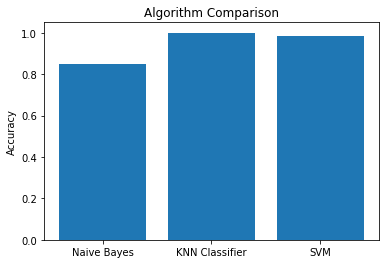

In [79]:
# Comparison of different classifiers in same plot:
# 1. k-NearestNeighbours with 1 neighbour
# 2. SVM with polynomial kernel
# 3. Naive Bayes

bayes_acc = accuracy
knn_best_acc = max(scores_list_train)
svm_acc = max(svm_accs)

plt.bar(["Naive Bayes", "KNN Classifier", "SVM"],[bayes_acc, knn_best_acc, svm_acc])
plt.ylabel("Accuracy")
plt.title("Algorithm Comparison")

# II. Regression

## 1. Linear Regression

In [127]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [130]:
# Import data
gapminder = pd.read_csv('gapminder.csv')

# Clean up data
gapminder = gapminder.dropna()
gapminder_regions = gapminder["Region"]
gapminder = gapminder.drop(columns="Region")
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2


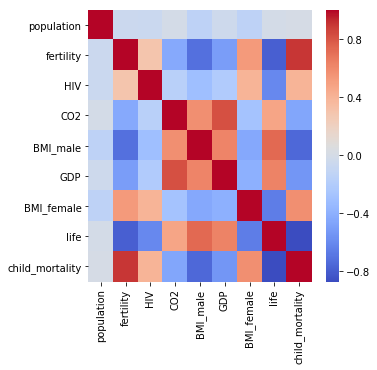

In [126]:
plt.figure(figsize = (5,5))

gapminder_corr = gapminder.corr()
sns.heatmap(data=gapminder_corr, 
            xticklabels=gapminder_corr.columns,
            yticklabels=gapminder_corr.columns,
            annot=False,
            cmap="coolwarm")

In [135]:
x = gapminder["fertility"]
y = gapminder["life"]

# Note the difference in argument order
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     296.3
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           3.60e-36
Time:                        22:28:44   Log-Likelihood:                -708.47
No. Observations:                 139   AIC:                             1419.
Df Residuals:                     138   BIC:                             1422.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fertility     17.0078      0.988     17.214      0.000      15.054      18.961
==============================================================================
Omnibus:                       17.527   Durbin-Watson:                   1.575
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.950
Skew:                          -0.823   Prob(JB):                     0.000127
Kurtosis:                       2.377   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

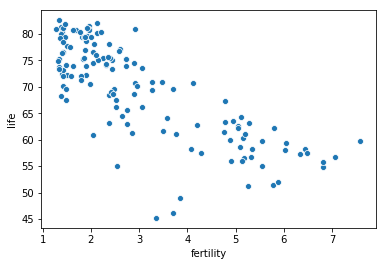

In [141]:
sns.scatterplot(data=gapminder, x="fertility", y="life")